In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os, glob
import tensorflow as tf
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import *
from keras.layers import *
from tensorflow.keras.optimizers import *
from keras.preprocessing.image import *

In [2]:
data_dir = "Data"
Rice=[]
for file in os.listdir(data_dir):
    Rice+=[file]
print(Rice)
print(len(Rice))

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
5


In [3]:
img_height,img_width=128,128
batch_size=20

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset="training")
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset="validation")

Found 52500 images belonging to 5 classes.
Found 22500 images belonging to 5 classes.


## DenseNet

In [4]:
base_model =tf.keras.applications.DenseNet121(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 3

In [5]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
hist=model.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5
2625/2625 [==============================] - 8381s 3s/step - loss: 0.0935 - accuracy: 0.9693 - val_loss: 1.9985 - val_accuracy: 0.6880
Epoch 2/5
2625/2625 [==============================] - 8568s 3s/step - loss: 0.0515 - accuracy: 0.9834 - val_loss: 0.1523 - val_accuracy: 0.9419
Epoch 3/5
2625/2625 [==============================] - 7724s 3s/step - loss: 0.0395 - accuracy: 0.9882 - val_loss: 1.2533 - val_accuracy: 0.6224
Epoch 4/5
2625/2625 [==============================] - 7114s 3s/step - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.0186 - val_accuracy: 0.9953
Epoch 5/5
2625/2625 [==============================] - 7124s 3s/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.5025 - val_accuracy: 0.8589


In [6]:
model.evaluate(test_generator)
model.save("models/DenseNet.h5")

1125/1125 [==============================] - 586s 521ms/step - loss: 0.5025 - accuracy: 0.8589


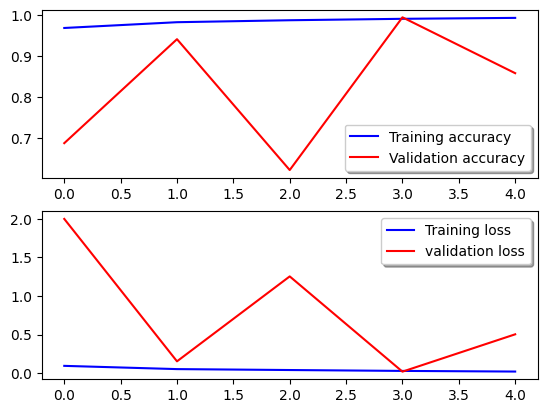

In [7]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

# CNN


In [8]:
model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (img_height,img_width,3)))
model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(256, activation = "relu"))

model1.add(Dense(5, activation = "softmax"))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

In [9]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
hist1=model1.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5
2625/2625 [==============================] - 3162s 1s/step - loss: 0.1221 - accuracy: 0.9594 - val_loss: 0.2165 - val_accuracy: 0.9300
Epoch 2/5
2625/2625 [==============================] - 3154s 1s/step - loss: 0.0773 - accuracy: 0.9748 - val_loss: 0.1432 - val_accuracy: 0.9468
Epoch 3/5
2625/2625 [==============================] - 3169s 1s/step - loss: 0.0572 - accuracy: 0.9806 - val_loss: 0.0825 - val_accuracy: 0.9674
Epoch 4/5
2625/2625 [==============================] - 3179s 1s/step - loss: 0.0294 - accuracy: 0.9896 - val_loss: 0.0660 - val_accuracy: 0.9748
Epoch 5/5
2625/2625 [==============================] - 3215s 1s/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0667 - val_accuracy: 0.9767


In [10]:
model1.evaluate(test_generator)
model1.save("models/CNN.h5")

1125/1125 [==============================] - 253s 225ms/step - loss: 0.0667 - accuracy: 0.9767


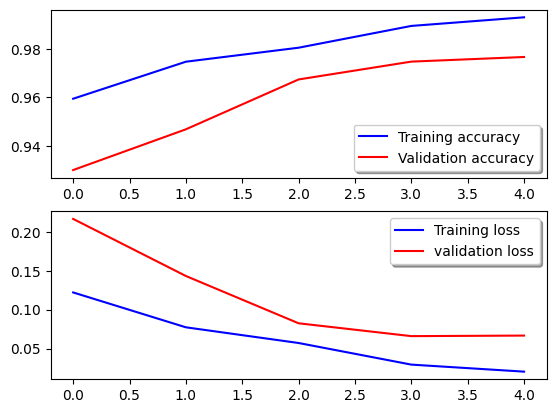

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['loss'], color='b', label="Training loss")
ax[1].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

# MOBILENET

In [12]:
import tensorflow as tf

In [13]:
base_model2 =tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model2 = Sequential()
model2.add(base_model2)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(5, activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 64)                65600     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [14]:
model2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
hist2=model2.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5
2625/2625 [==============================] - 22887s 9s/step - loss: 0.0593 - accuracy: 0.9828 - val_loss: 0.0080 - val_accuracy: 0.9983
Epoch 2/5
2625/2625 [==============================] - 2329s 887ms/step - loss: 0.0270 - accuracy: 0.9922 - val_loss: 0.0143 - val_accuracy: 0.9955
Epoch 3/5
2625/2625 [==============================] - 2286s 871ms/step - loss: 0.0210 - accuracy: 0.9942 - val_loss: 0.0437 - val_accuracy: 0.9840
Epoch 4/5
2625/2625 [==============================] - 2161s 823ms/step - loss: 0.0155 - accuracy: 0.9955 - val_loss: 0.0154 - val_accuracy: 0.9945
Epoch 5/5
2625/2625 [==============================] - 2202s 839ms/step - loss: 0.0136 - accuracy: 0.9964 - val_loss: 0.0100 - val_accuracy: 0.9968


In [15]:
model2.evaluate(test_generator)
model2.save("models/Mobilenet.h5")

1125/1125 [==============================] - 154s 137ms/step - loss: 0.0100 - accuracy: 0.9968


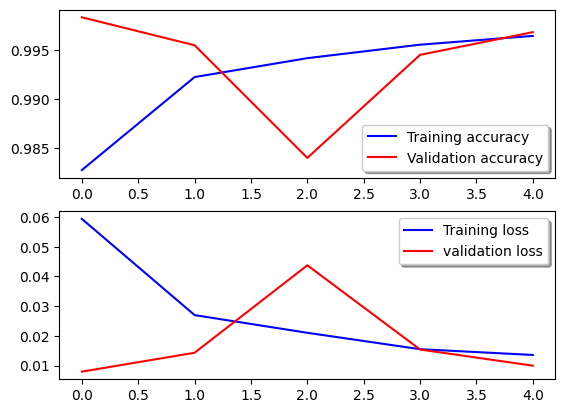

In [16]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist2.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist2.history['loss'], color='b', label="Training loss")
ax[1].plot(hist2.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [17]:
Accuracy = []

for i in [hist, hist1, hist2]:
    x = i.history.get('accuracy')[-1]
    Accuracy.append(x)

Accuracy

[0.9939428567886353, 0.9931238293647766, 0.9964190721511841]

1/1 [==============================] - 1s 789ms/step
[0.9999842  0.00394852 0.00154327 0.94882035 0.14950708]


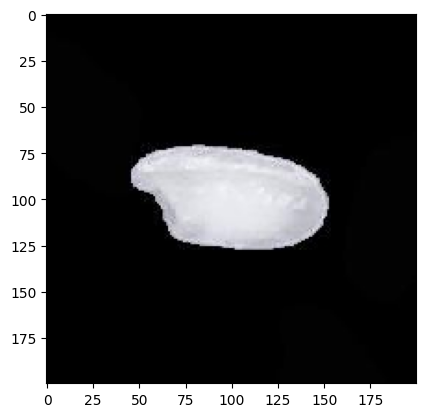

Prediction: Arborio


In [20]:
from skimage import io
from tensorflow.keras.preprocessing import image

img = image.load_img(r'Data\Arborio\Arborio (1).jpg', grayscale=False, target_size=(128,128))
show_img=image.load_img(r'Data\Arborio\Arborio (1).jpg', grayscale=False, target_size=(200, 200))
Rice = Rice
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model2.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',Rice[ind])
